In [1]:
import mne # http://martinos.org/mne/

In [2]:
from mne.datasets import sample
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
print(raw_fname)

C:\Users\HP\mne_data\MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


In [3]:
raw = mne.io.Raw(raw_fname,preload=True)
print(raw)

Opening raw data file C:\Users\HP\mne_data\MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~123.3 MB, data loaded>


In [4]:
raw.filter(1.,40.,n_jobs=1)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 497 samples (3.310 sec)



<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~123.3 MB, data loaded>

In [5]:
raw.info

<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 GRAD, 102 MAG, 9 STIM, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>

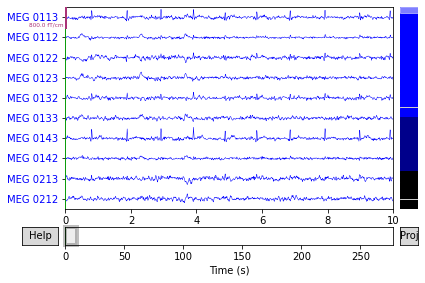

In [6]:
fig = raw.plot(n_channels=10)

In [44]:

%matplotlib inline
plt.rcParams['figure.figsize'] = 9, 6
plt.rcParams['font.size'] = 16

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Effective window size : 13.639 (s)
Effective window size : 13.639 (s)
Effective window size : 13.639 (s)


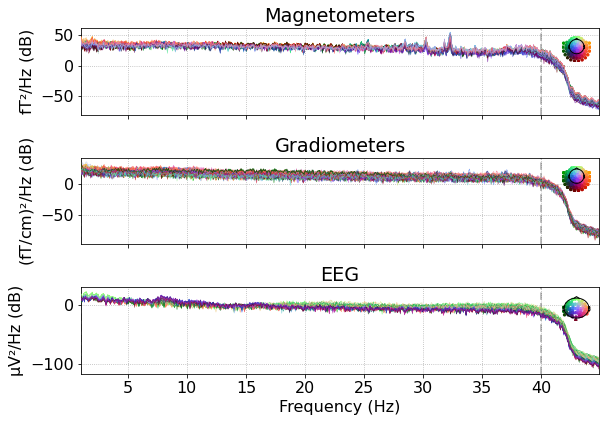

In [45]:
raw.plot_psd(fmin=1., fmax=45., tmax=60., average=False);

In [8]:
events = mne.find_events(raw,verbose=True)
print(events[:5])

319 events found
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


<ipython-input-9-defbf0777b19>:2: RuntimeWarning: event 5 missing from event_id will be ignored
  mne.viz.plot_events(events,raw.info['sfreq'],raw.first_samp,event_id=event_id);
<ipython-input-9-defbf0777b19>:2: RuntimeWarning: event 32 missing from event_id will be ignored
  mne.viz.plot_events(events,raw.info['sfreq'],raw.first_samp,event_id=event_id);


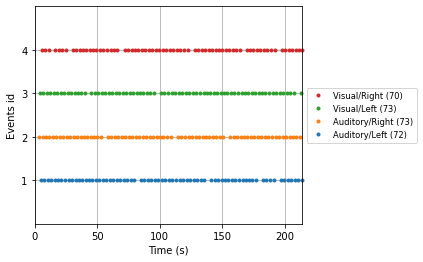

In [9]:
event_id = {"Auditory/Left":1,"Auditory/Right":2,"Visual/Left":3,"Visual/Right":4}
mne.viz.plot_events(events,raw.info['sfreq'],raw.first_samp,event_id=event_id);

In [10]:
tmin,tmax = -0.2, 0.5
picks = mne.pick_types(raw.info, meg= True, eeg=True, stim=True, eog=True,exclude='bads')
decim = 2
epochs = mne.Epochs(raw,events,event_id,tmin,tmax,proj=True,picks=picks,baseline=None,preload=True,reject=dict(grad=4000e-13,mag=4e-12,eog=150e-6),decim=decim)
print(epochs)

Not setting metadata
Not setting metadata
288 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Loading data for 288 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']


<ipython-input-10-7fb476961a12>:4: RuntimeWarning: The measurement information indicates a low-pass frequency of 40 Hz. The decim=2 parameter will result in a sampling frequency of 75.0769 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw,events,event_id,tmin,tmax,proj=True,picks=picks,baseline=None,preload=True,reject=dict(grad=4000e-13,mag=4e-12,eog=150e-6),decim=decim)


    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['M

In [11]:
import numpy as np
data = epochs.get_data()
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(240, 374, 53)


In [12]:
epochs.average()

<Evoked | '0.23 * Auditory/Left + 0.25 * Auditory/Right + 0.28 * Visual/Left + 0.23 * Visual/Right' (average, N=240), [-0.1998, 0.49283] sec, 364 ch, ~3.8 MB>

In [13]:
epochs['Left'].average()

<Evoked | '0.46 * Auditory/Left + 0.54 * Visual/Left' (average, N=123), [-0.1998, 0.49283] sec, 364 ch, ~3.8 MB>

In [14]:
evoked = epochs['Auditory'].average()

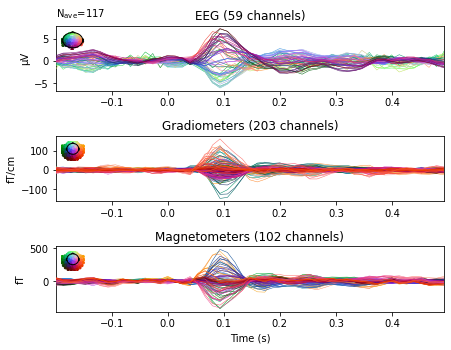

In [15]:
evoked.plot(spatial_colors=True);

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


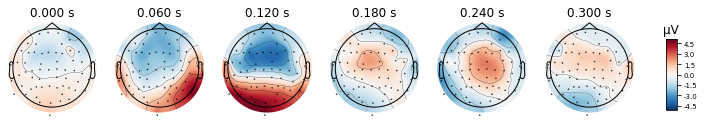

In [17]:
evoked.plot_topomap(ch_type='eeg', times=np.linspace(0.,0.3,6));

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


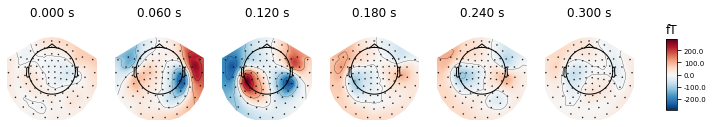

In [19]:
evoked.plot_topomap(ch_type='mag', times=np.linspace(0.,0.3,6));

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


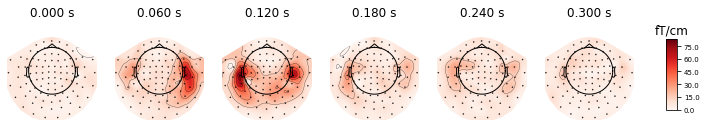

In [20]:
evoked.plot_topomap(ch_type='grad', times=np.linspace(0.,0.3,6));

In [26]:
from ipywidgets import interact
import ipywidgets as widgets

@interact(time=(evoked.times[0],evoked.times[-1],0.01),
          continuous_update=False)

def plot_topo(time):
    evoked.plot_topomap(ch_type='eeg', times=(time),size=3., vmin=-5., vmax=5.)

interactive(children=(FloatSlider(value=0.14020478684161217, description='time', max=0.49282819245735676, min=…

In [43]:

from mne.preprocessing import ICA
ica = ICA(n_components=0.95, method='fastica', random_state=0).fit(epochs,decim=4)

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by explained variance: 150 components


g:\python\python37\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Fitting ICA took 16.5s.


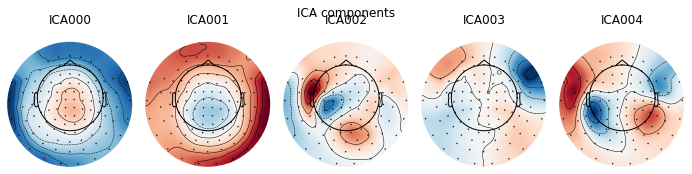

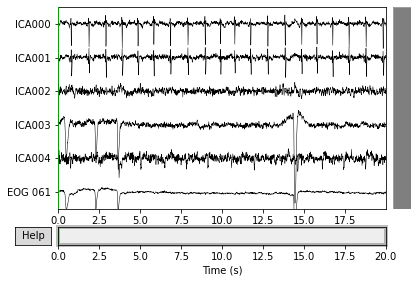

In [34]:
ica.plot_components(picks=range(5));
ica.plot_sources(raw.copy().crop(0,20),picks=range(5));

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


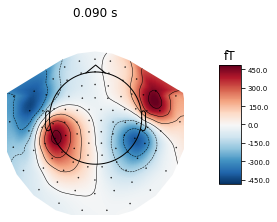

In [35]:
evoked.plot_topomap(times=[0.09],size=2);

Using surface: C:\Users\HP\mne_data\MNE-sample-data/subjects\sample\bem\inner_skull.surf
Using surface: C:\Users\HP\mne_data\MNE-sample-data/subjects\sample\bem\outer_skull.surf
Using surface: C:\Users\HP\mne_data\MNE-sample-data/subjects\sample\bem\outer_skin.surf


g:\python\python37\lib\site-packages\mne\viz\utils.py:111: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


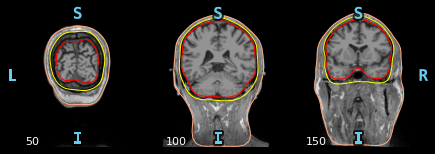

In [50]:

# Let's look the anatomy of the subject
subjects_dir = data_path + '/subjects'
mne.viz.plot_bem(subject='sample', subjects_dir=subjects_dir, slices=[50, 100, 150]);

In [51]:

# Let's look how the head fits in the system (coregistration)
fname_bem = data_path + '/subjects/sample/bem/sample-5120-5120-5120-bem-sol.fif'
fname_trans = data_path + ('/MEG/sample/sample_audvis_raw-trans.fif')

In [52]:

cov = mne.compute_covariance(epochs)  # estimate noise covariance
from joblib import Memory  # load cached result

mem = Memory(cachedir='./', verbose=0)

evoked_dip = evoked.copy().crop(0.095, 0.095)
evoked_dip.set_eeg_reference(projection=True)  # set common average reference
dipole, _ = mem.cache(mne.fit_dipole)(
                evoked_dip,
                cov, fname_bem, fname_trans)
print(dipole)

Computing rank from data with rank=None
    Using tolerance 9e-09 (2.2e-16 eps * 305 dim * 1.3e+05  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
    Using tolerance 4.1e-11 (2.2e-16 eps * 59 dim * 3.1e+03  max singular value)
    Estimated rank (eeg): 58
    EEG: rank 58 computed from 59 data channels with 1 projector
    Created an SSP operator (subspace dimension = 4)
    Setting small MEG eigenvalues to zero (without PCA)
    Setting small EEG eigenvalues to zero (without PCA)
Reducing data rank from 364 -> 360
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 12720
[done]


g:\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='./'", use "location='./'" instead.
  after removing the cwd from sys.path.
<ipython-input-52-40ef7d112568>:7: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  evoked_dip.set_eeg_reference(projection=True)  # set common average reference


<Dipole | n_times : 1, tmin : 0.093, tmax : 0.093>


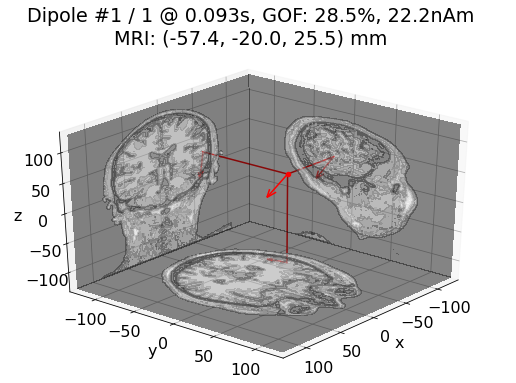

In [53]:
dipole.plot_locations(trans=fname_trans, subject='sample',
                      subjects_dir=subjects_dir);

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from mne.decoding import SlidingEstimator, cross_val_multiscore

In [56]:

picks = mne.pick_types(epochs.info, meg=True, ref_meg=False, stim=False)
X = epochs.get_data()[:, picks]  # MEG signals: n_epochs, n_channels, n_times
y = (epochs.events[:, 2] - 1) // 2  # target: visual or auditory

clf = make_pipeline(StandardScaler(), LogisticRegression())

X_2d = X.reshape(len(X), -1)
scores = cross_val_score(clf, X_2d, y, cv=5, n_jobs=1, scoring='accuracy')

# Mean scores across cross-validation splits
print("Cross-validation (Accuracy) score : %s" % np.mean(scores))

Cross-validation (Accuracy) score : 1.0


In [57]:
time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc')
scores = cross_val_multiscore(time_decod, X, y, cv=5, n_jobs=1)

# Mean scores across cross-validation splits for each time instant
scores = np.mean(scores, axis=0)
print(scores.shape)
print(X.shape)


(53,)
(240, 305, 53)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

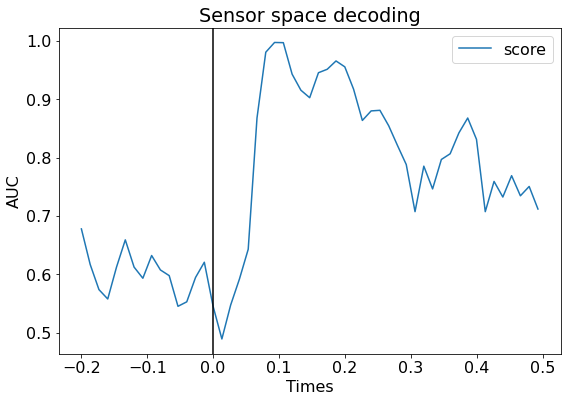

In [58]:
fig, ax = plt.subplots()
ax.plot(epochs.times, scores, label='score')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding')
plt.show()